## Name - Rahul Raman
## Project - 'Order' pandasql

In [ ]:
!pip install pandas pandasql

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Order .csv', encoding='unicode_escape')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,849,CA-2017-107503,1/1/2017,6/1/2017,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,4010,CA-2017-144463,1/1/2017,5/1/2017,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,6683,CA-2017-154466,1/1/2017,2/1/2017,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,8070,CA-2017-151750,1/1/2017,5/1/2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,8071,CA-2017-151750,1/1/2017,5/1/2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [ ]:
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day

In [ ]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

In [ ]:
df['Ship_Year'] = df['Ship_Date'].dt.year
df['Ship_Month'] = df['Ship_Date'].dt.month
df['Ship_Day'] = df['Ship_Date'].dt.day

In [ ]:


df['Shipping_Delay'] = (df['Ship_Date'] - df['Order_Date']).dt.days


In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

In [ ]:
conn = sqlite3.connect('Order.db')
df.to_sql('Order', conn, if_exists='replace', index=False)
conn.close

<function Connection.close()>

In [ ]:
conn = sqlite3.connect('Order.db')
conn.commit()
user = pd.read_sql_query('''SELECT * FROM "Order"''', conn)

In [ ]:
pd.read_sql_query('''

select * from "Order"


  ''',conn)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,Shipping_Delay
0,849,CA-2017-107503,2017-01-01 00:00:00,2017-06-01 00:00:00,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,4,0.2,8.5568,2017.0,1.0,1.0,2017.0,6.0,1.0,151.0
1,4010,CA-2017-144463,2017-01-01 00:00:00,2017-05-01 00:00:00,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,11,0.0,199.2606,2017.0,1.0,1.0,2017.0,5.0,1.0,120.0
2,6683,CA-2017-154466,2017-01-01 00:00:00,2017-02-01 00:00:00,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,2,0.0,1.7280,2017.0,1.0,1.0,2017.0,2.0,1.0,31.0
3,8070,CA-2017-151750,2017-01-01 00:00:00,2017-05-01 00:00:00,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,5,0.2,-107.9580,2017.0,1.0,1.0,2017.0,5.0,1.0,120.0
4,8071,CA-2017-151750,2017-01-01 00:00:00,2017-05-01 00:00:00,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,5,0.6,-187.3815,2017.0,1.0,1.0,2017.0,5.0,1.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,908,CA-2017-143259,None,2018-03-01 00:00:00,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,7,0.0,2.7279,NaN,NaN,NaN,2018.0,3.0,1.0,NaN
3308,909,CA-2017-143259,None,2018-03-01 00:00:00,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,3,0.2,19.7910,NaN,NaN,NaN,2018.0,3.0,1.0,NaN
3309,1297,CA-2017-115427,None,2018-03-01 00:00:00,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,2,0.2,4.5188,NaN,NaN,NaN,2018.0,3.0,1.0,NaN
3310,1298,CA-2017-115427,None,2018-03-01 00:00:00,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,2,0.2,6.4750,NaN,NaN,NaN,2018.0,3.0,1.0,NaN


In [ ]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,Shipping_Delay
count,3312.000000,1322,1320,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,1322.0,1322.000000,1322.000000,1320.000000,1320.000000,1320.000000,939.000000
mean,5087.107488,2017-06-16 16:19:14.614220800,2017-07-07 18:46:54.545454592,56186.515097,221.381418,3.766908,0.156467,28.212340,2017.0,6.265507,8.242814,2017.031818,6.589394,7.942424,105.334398
min,13.000000,2017-01-01 00:00:00,2017-01-02 00:00:00,1841.000000,0.444000,1.000000,0.000000,-3839.990400,2017.0,1.000000,1.000000,2017.000000,1.000000,1.000000,0.000000
25%,2655.750000,2017-03-07 00:00:00,2017-04-10 00:00:00,27978.750000,17.018000,2.000000,0.000000,1.763200,2017.0,3.000000,6.000000,2017.000000,4.000000,5.000000,61.000000
50%,5183.500000,2017-06-11 00:00:00,2017-07-06 00:00:00,60472.500000,53.810000,3.000000,0.200000,8.296800,2017.0,6.000000,9.000000,2017.000000,6.000000,9.000000,120.000000
75%,7498.250000,2017-09-12 00:00:00,2017-10-09 00:00:00,90032.000000,205.105700,5.000000,0.200000,28.315125,2017.0,9.000000,11.000000,2017.000000,10.000000,11.000000,153.000000
max,9994.000000,2017-12-11 00:00:00,2018-05-01 00:00:00,99301.000000,13999.960000,14.000000,0.800000,6719.980800,2017.0,12.000000,12.000000,2018.000000,12.000000,12.000000,214.000000
std,2817.482266,NaN,NaN,31980.375516,585.257531,2.221776,0.207429,241.864342,0.0,3.545509,3.210630,0.175582,3.465792,3.392855,55.087844


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          3312 non-null   int64         
 1   Order_ID        3312 non-null   object        
 2   Order_Date      1322 non-null   datetime64[ns]
 3   Ship_Date       1320 non-null   datetime64[ns]
 4   Ship_Mode       3312 non-null   object        
 5   Customer_ID     3312 non-null   object        
 6   Customer_Name   3312 non-null   object        
 7   Segment         3312 non-null   object        
 8   Country         3312 non-null   object        
 9   City            3312 non-null   object        
 10  State           3312 non-null   object        
 11  Postal_Code     3312 non-null   int64         
 12  Region          3312 non-null   object        
 13  Product_ID      3312 non-null   object        
 14  Category        3312 non-null   object        
 15  Sub_

In [ ]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,Shipping_Delay
0,849,CA-2017-107503,2017-01-01,2017-06-01,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,4,0.2,8.5568,2017.0,1.0,1.0,2017.0,6.0,1.0,151.0
1,4010,CA-2017-144463,2017-01-01,2017-05-01,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,11,0.0,199.2606,2017.0,1.0,1.0,2017.0,5.0,1.0,120.0
2,6683,CA-2017-154466,2017-01-01,2017-02-01,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,2,0.0,1.7280,2017.0,1.0,1.0,2017.0,2.0,1.0,31.0
3,8070,CA-2017-151750,2017-01-01,2017-05-01,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,5,0.2,-107.9580,2017.0,1.0,1.0,2017.0,5.0,1.0,120.0
4,8071,CA-2017-151750,2017-01-01,2017-05-01,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,5,0.6,-187.3815,2017.0,1.0,1.0,2017.0,5.0,1.0,120.0


## 1. Top 10 product Count

In [ ]:
top_10_product_count = pd.read_sql_query('''

select Product_Name , count(*)
 from "Order"
 group by Product_Name
 order by count(*) desc
 limit 10




  ''',conn)
top_10_product_count

,Product_Name,count(*)
0,Easy-staple paper,16
1,Staples,15
2,Staples in misc. colors,12
3,Staple envelope,11
4,Storex Dura Pro Binders,8
5,Staple remover,8
6,"Global Wood Trimmed Manager's Task Chair, Khaki",8
7,Strathmore Photo Mount Cards,7
8,Sterilite Officeware Hinged File Box,7
9,Logitech Desktop MK120 Mouse and keyboard Combo,7


<Axes: title={'center': 'Top 10 Product Count'}, xlabel='Product_Name'>

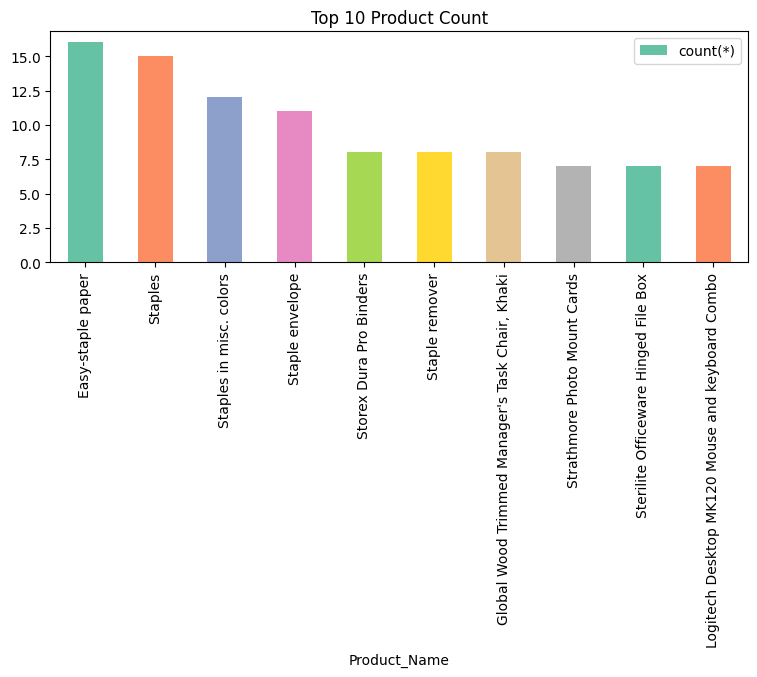

In [ ]:

top_10_product_count.plot(kind = 'bar', x = 'Product_Name', y = 'count(*)', title = 'Top 10 Product Count', figsize = (9,3), color=sns.color_palette("Set2"))

## 2. Top 10 Products by Quantity Sold

In [ ]:
Top_10_product_sold =  pd.read_sql_query('''

select Product_Name , sum(Quantity)
 from "Order"
 group by Product_Name
 order by sum(Quantity) desc
 limit 10




  ''',conn)
Top_10_product_sold


,Product_Name,sum(Quantity)
0,Staples,68
1,Easy-staple paper,58
2,Staples in misc. colors,52
3,Staple envelope,39
4,Storex Dura Pro Binders,37
5,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,34
6,Eldon Wave Desk Accessories,34
7,"Lesro Sheffield Collection Coffee Table, End T...",30
8,Logitech Desktop MK120 Mouse and keyboard Combo,29
9,GBC Instant Report Kit,29


<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Product_Name'>

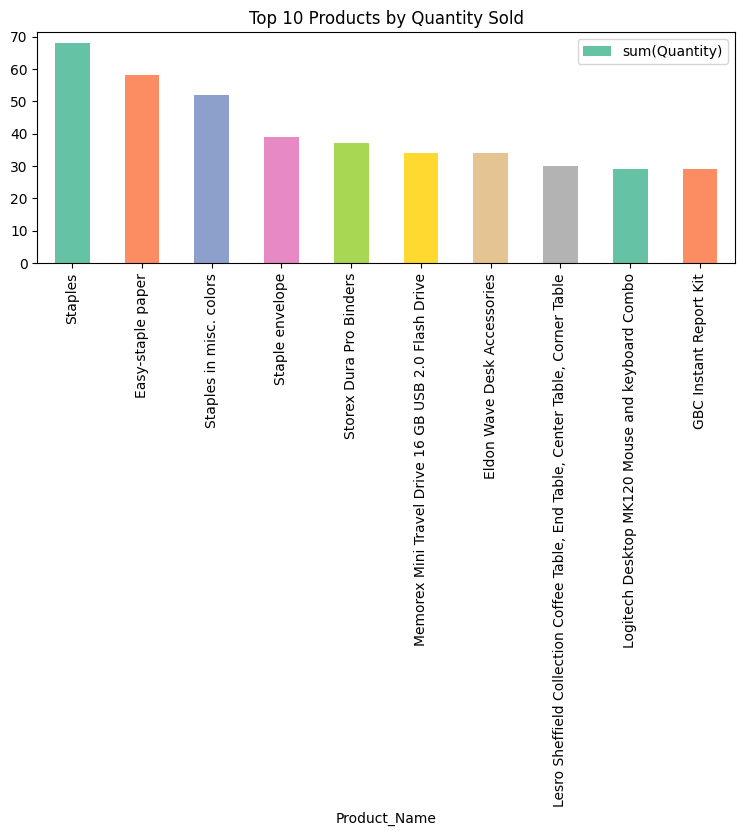

In [ ]:
Top_10_product_sold.plot(kind = 'bar', x = 'Product_Name', y = 'sum(Quantity)', title = 'Top 10 Products by Quantity Sold', figsize = (9,3), color=sns.color_palette("Set2"))

##3.Average Sales by Sub Category

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

In [ ]:
 sub_category_avg_sale =  pd.read_sql_query('''


select Sub_Category,avg(Sales) from "Order"
group by Sub_Category
order by avg(Sales) desc
limit 10





  ''',conn)
 sub_category_avg_sale

,Sub_Category,avg(Sales)
0,Copiers,2859.063091
1,Machines,1319.535606
2,Tables,585.514832
3,Chairs,502.917647
4,Bookcases,395.056312
5,Phones,358.301075
6,Supplies,272.023898
7,Appliances,260.163224
8,Storage,241.936174
9,Accessories,217.986298


<Axes: title={'center': 'Average Sales vs Sub Category '}, xlabel='Sub_Category'>

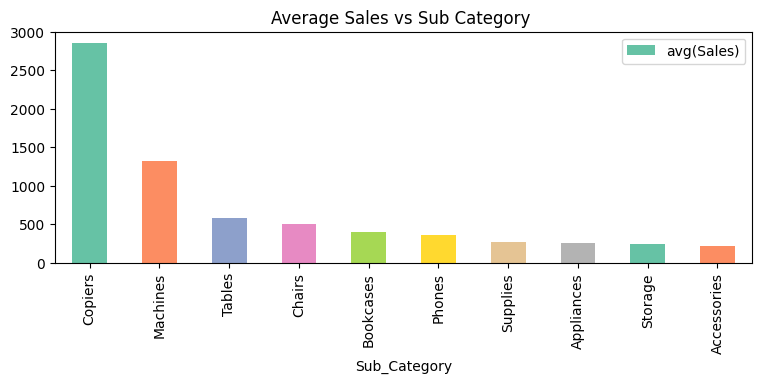

In [ ]:
sub_category_avg_sale.plot(kind = 'bar', x = 'Sub_Category', y = 'avg(Sales)', title = 'Average Sales vs Sub Category ', figsize = (9,3), color=sns.color_palette("Set2"))

##4. Region Wise Average Sales

In [ ]:
 Region_wise_avg_sale = pd.read_sql_query ('''

select Region, avg(Sales) from "Order"
group by Region
order by avg(Sales) desc





''',conn)
 Region_wise_avg_sale

,Region,avg(Sales)
0,South,237.269995
1,East,231.360374
2,West,228.427731
3,Central,189.072144


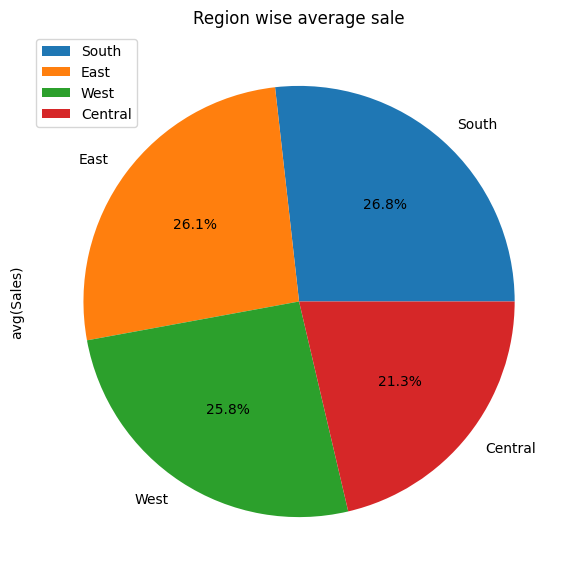

In [ ]:
Region_wise_avg_sale.plot(kind='pie', y='avg(Sales)', labels=Region_wise_avg_sale['Region'], autopct='%1.1f%%', title='Region wise average sale', figsize=(7, 7))
plt.show()

## 5.Top Ship_Mode Method used

In [ ]:
 Top_ship_mode = pd.read_sql_query ('''

select Ship_Mode, count(*) from "Order"
group by Ship_Mode
order by count(*) desc


''',conn)
 Top_ship_mode


,Ship_Mode,count(*)
0,Standard Class,1897
1,Second Class,657
2,First Class,572
3,Same Day,186


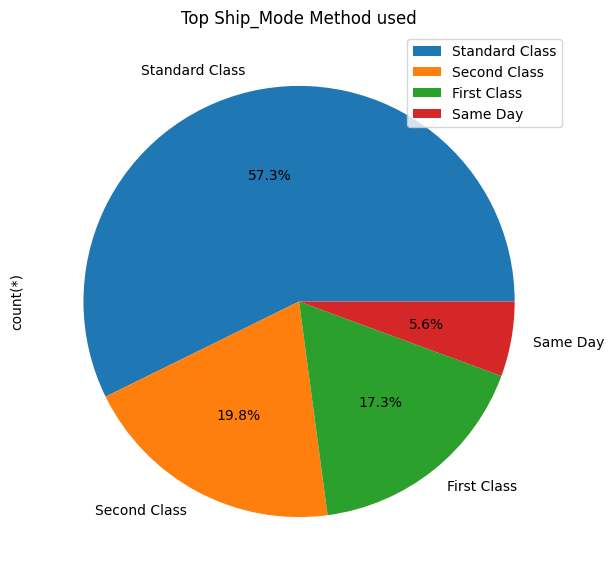

In [ ]:
Top_ship_mode.plot(kind='pie', y='count(*)', labels=Top_ship_mode['Ship_Mode'], autopct='%1.1f%%', title='Top Ship_Mode Method used', figsize=(7, 7))
plt.show()

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

# 6.Top 5 City by Total No OF Quantity Sold

In [ ]:
 top_city_by_quantity =  pd.read_sql_query ('''

select City, count(Quantity) from "Order"
group by City
order by count(Quantity) desc
limit 5


''',conn)
top_city_by_quantity

,City,count(Quantity)
0,New York City,306
1,Los Angeles,210
2,San Francisco,190
3,Seattle,182
4,Philadelphia,182


<Axes: title={'center': 'Top 10 City by Total No OF Quantity Sold'}, xlabel='City'>

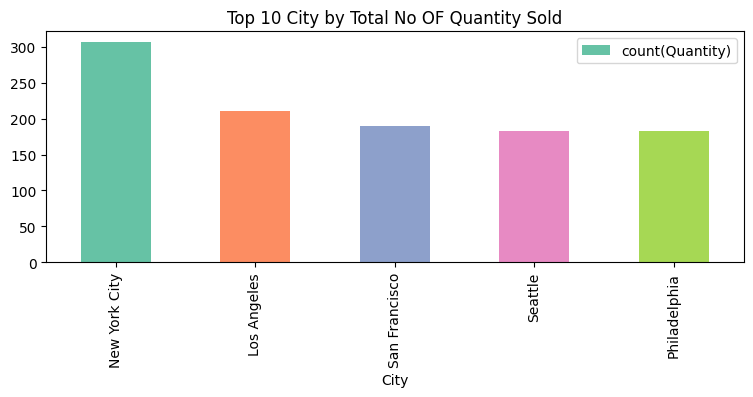

In [ ]:
top_city_by_quantity.plot(kind='bar', x='City', y='count(Quantity)', title='Top 10 City by Total No OF Quantity Sold', figsize=(9, 3), color=sns.color_palette("Set2"))

## 7. State Wise Average sales

In [ ]:
top_state_avg_sales =  pd.read_sql_query ('''

select State, avg(Sales) from "Order"
group by State
order by avg(Sales) desc
limit 10


''',conn)
top_state_avg_sales

,State,avg(Sales)
0,Montana,845.856000
1,Delaware,723.946474
2,Nevada,523.026333
3,Louisiana,392.967857
4,Michigan,385.576851
5,Oklahoma,366.230000
6,Missouri,359.646154
7,Nebraska,357.935000
8,Georgia,309.032581
9,Washington,304.836726


<Axes: title={'center': 'Top 10 State by Average Sales'}, xlabel='State'>

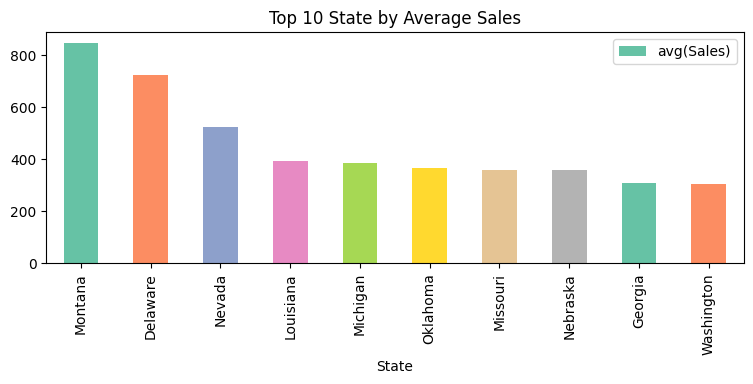

In [ ]:
top_state_avg_sales.plot(kind='bar', x='State', y='avg(Sales)', title='Top 10 State by Average Sales', figsize=(9, 3), color=sns.color_palette("Set2"))

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

##8. Ship Mode wise average sales

In [ ]:
ship_mode_vs_avg_sales =  pd.read_sql_query ('''

select Ship_Mode, avg(Sales) from "Order"
group by Ship_Mode
order by avg(Sales) desc





''',conn)
ship_mode_vs_avg_sales


,Ship_Mode,avg(Sales)
0,Same Day,262.235161
1,First Class,244.990169
2,Second Class,226.334282
3,Standard Class,208.541653


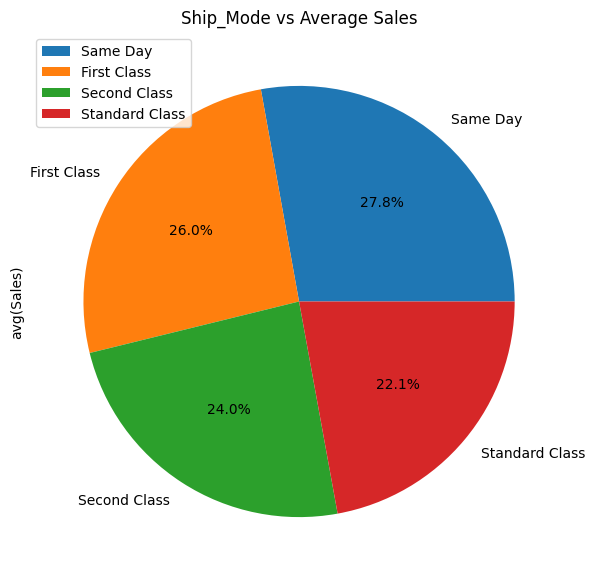

In [ ]:
ship_mode_vs_avg_sales.plot(kind='pie', y='avg(Sales)', labels=ship_mode_vs_avg_sales['Ship_Mode'], autopct='%1.1f%%', title='Ship_Mode vs Average Sales', figsize=(7, 7))
plt.show()

##9. State wise average sales on same day

In [ ]:
top_state_avg_sales_on_same_day =  pd.read_sql_query ('''

select State, avg(Sales) from "Order"
where Ship_Mode = 'Same Day'
group by State
order by avg(Sales) desc
limit 10




''',conn)
top_state_avg_sales_on_same_day

,State,avg(Sales)
0,North Carolina,1288.365857
1,West Virginia,673.344000
2,Maryland,672.440000
3,Oklahoma,464.452000
4,Washington,396.143222
5,Massachusetts,290.040000
6,California,279.959095
7,Pennsylvania,273.197200
8,Michigan,269.770000
9,Nebraska,267.033333


<Axes: title={'center': 'Top 10 State by Average Sales on Same Day'}, xlabel='State'>

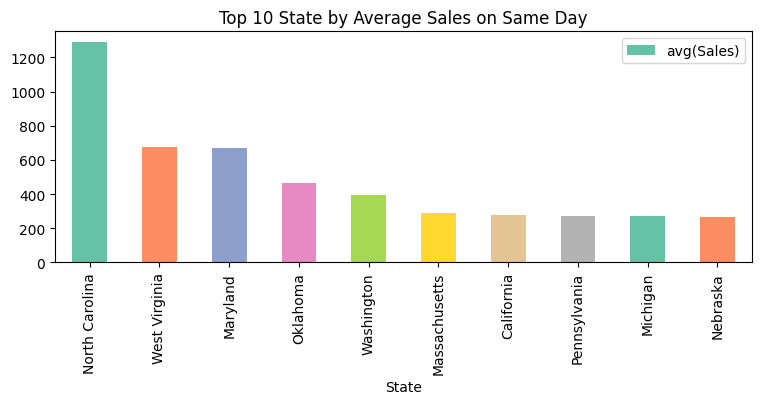

In [ ]:
top_state_avg_sales_on_same_day.plot(kind='bar', x='State', y='avg(Sales)', title='Top 10 State by Average Sales on Same Day', figsize=(9, 3), color=sns.color_palette('Set2'))

## 10.State wise Total Profit

In [ ]:
 top_state_total_profit = pd.read_sql_query ('''

select State, sum(Profit) from "Order"
group by State
order by sum(Profit) desc
limit 10





''',conn)
 top_state_total_profit


,State,sum(Profit)
0,California,29366.4589
1,New York,24357.0717
2,Washington,17256.7798
3,Michigan,8487.7618
4,Georgia,6447.9819
5,Delaware,6053.2049
6,Indiana,5139.5257
7,Kentucky,4751.7214
8,Maryland,2780.6070
9,Minnesota,2459.8789


<Axes: title={'center': 'State wise Total Profit'}, xlabel='State'>

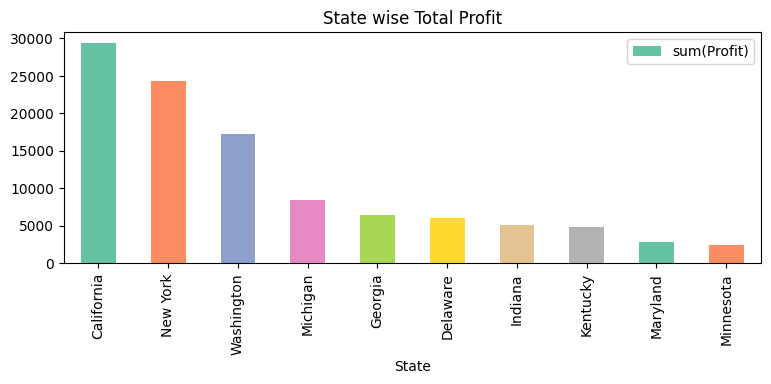

In [ ]:
top_state_total_profit.plot(kind='bar', x='State', y='sum(Profit)', title='State wise Total Profit', figsize=(9, 3), color=sns.color_palette('Set2'))

#11.top 10 product vs average profit

In [ ]:
 top_10_product_vs_avg_profit = pd.read_sql_query ('''

select Product_Name, avg(Profit) from "Order"
group by Product_Name
order by avg(Profit) desc
limit 10




''',conn)
top_10_product_vs_avg_profit


,Product_Name,avg(Profit)
0,Canon imageCLASS 2200 Advanced Copier,5226.651733
1,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.205000
2,"3D Systems Cube Printer, 2nd Generation, Magenta",1351.989600
3,Hewlett Packard LaserJet 3310 Copier,905.984900
4,GBC DocuBind 200 Manual Binding Machine,884.058000
5,Canon Image Class D660 Copier,845.985900
6,Canon Imageclass D680 Copier / Fax,839.988000
7,Fellowes Powershred HS-440 4-Sheet High Securi...,767.200500
8,ClearOne CHATAttach 160 - speaker phone,743.988000
9,Logitech Z-906 Speaker sys - home theater - 5....,659.980000


<Axes: title={'center': 'Top 10 Product vs Average Profit'}, xlabel='Product_Name'>

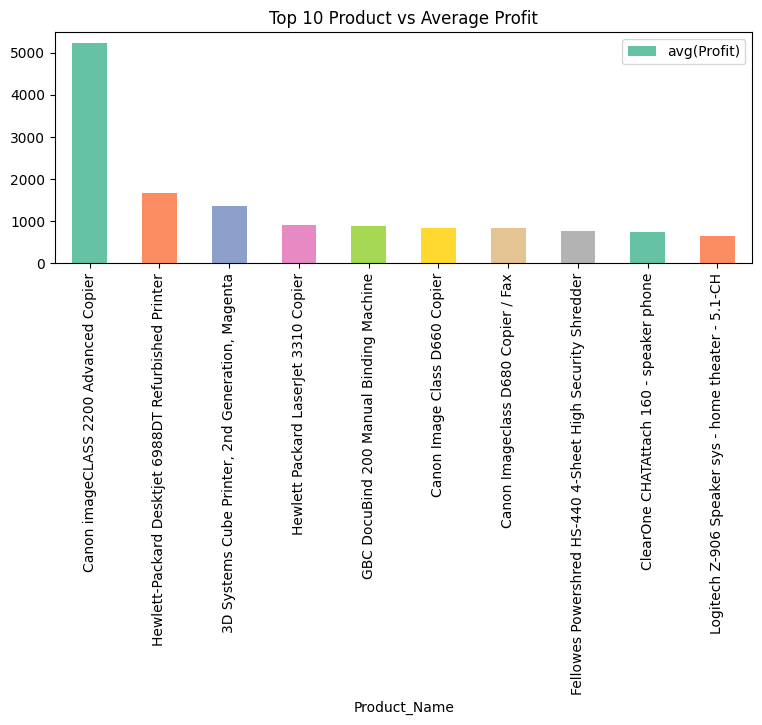

In [ ]:
top_10_product_vs_avg_profit.plot(kind='bar', x='Product_Name', y='avg(Profit)', title='Top 10 Product vs Average Profit', figsize=(9, 3), color=sns.color_palette('Set2'))

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

#12.City wise heighest selling product

In [ ]:
city_product_total_sales = pd.read_sql_query ('''

 select City, Product_Name, sum(Sales) from "Order"
 group by City, Product_Name
 order by sum(Sales) desc
 limit 5





''',conn)
city_product_total_sales


,City,Product_Name,sum(Sales)
0,Seattle,Canon imageCLASS 2200 Advanced Copier,13999.960
1,New York City,Canon imageCLASS 2200 Advanced Copier,11199.968
2,Newark,Canon imageCLASS 2200 Advanced Copier,10499.970
3,Burlington,Cubify CubeX 3D Printer Triple Head Print,7999.980
4,Jackson,GBC DocuBind P400 Electric Binding System,5443.960


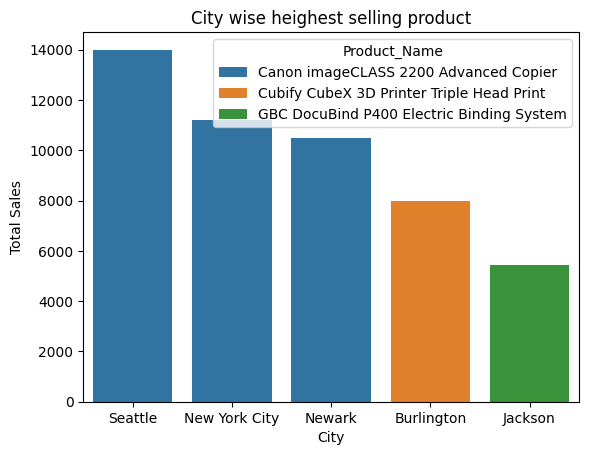

In [ ]:
sns.barplot(data=city_product_total_sales, x='City', y='sum(Sales)', hue='Product_Name')

plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('City wise heighest selling product')
plt.show()

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

#13. Top Repeated Customer Count

In [ ]:
Reapeated_Customer =  pd.read_sql_query('''

 select Customer_Name, count(*) from "Order"
 group by Customer_name
 order by count(*) desc
 limit 10





''',conn)
Reapeated_Customer



,Customer_Name,count(*)
0,Seth Vernon,20
1,John Lee,20
2,Mick Hernandez,19
3,Dean percer,19
4,Lena Cacioppo,17
5,Saphhira Shifley,16
6,Ann Chong,16
7,Janet Martin,15
8,Emily Phan,15
9,Darrin Sayre,15


<Axes: title={'center': 'Top Repeated Customer Count'}, xlabel='Customer_Name'>

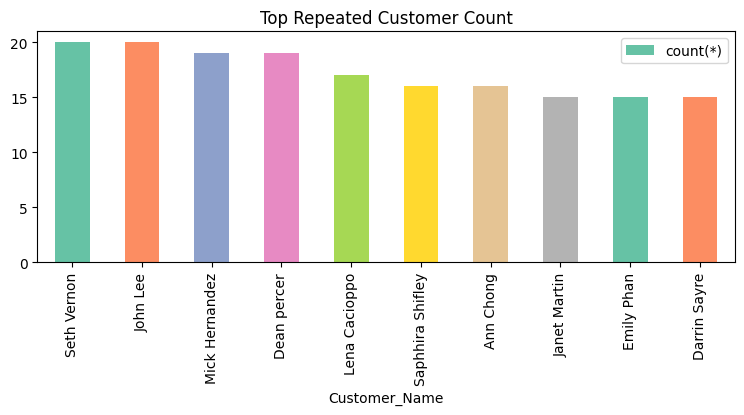

In [ ]:
Reapeated_Customer.plot(kind='bar', x='Customer_Name', y='count(*)', title='Top Repeated Customer Count', figsize=(9, 3), color=sns.color_palette('Set2'))

# 14.Sub-Category wise average Profit

In [ ]:
  sub_category_avg_profit = pd.read_sql_query('''

 select Sub_Category, avg(Profit) from "Order"
 group by Sub_Category
 order by avg(Profit) desc
 limit 10





''',conn)
  sub_category_avg_profit








,Sub_Category,avg(Profit)
0,Copiers,1137.808645
1,Accessories,56.990389
2,Appliances,47.668293
3,Phones,43.705187
4,Chairs,40.229207
5,Paper,26.232774
6,Storage,25.704169
7,Envelopes,20.306465
8,Binders,15.339484
9,Labels,15.303590


<ipython-input-130-fada38a913e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_avg_profit, x='Sub_Category', y='avg(Profit)', palette='Set2', ax=ax)


<Figure size 900x300 with 0 Axes>

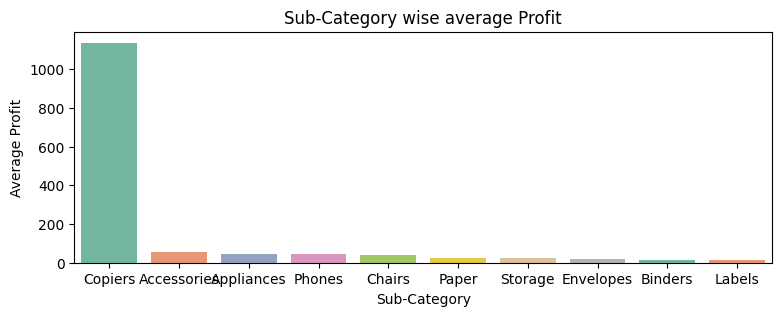

In [ ]:
plt.figure(figsize=(9,3))

fig, ax = plt.subplots(figsize=(9, 3))


sns.barplot(data=sub_category_avg_profit, x='Sub_Category', y='avg(Profit)', palette='Set2', ax=ax)

plt.xlabel('Sub-Category')
plt.ylabel('Average Profit')
plt.title('Sub-Category wise average Profit')
plt.show()


# 15.Category wise discount Analysis

In [ ]:
 category_avg_discount = pd.read_sql_query('''

select Category, avg(Discount) from "Order"
group by Category
order by avg(Discount) desc




''',conn)
category_avg_discount

,Category,avg(Discount)
0,Furniture,0.169854
1,Office Supplies,0.160040
2,Technology,0.130288


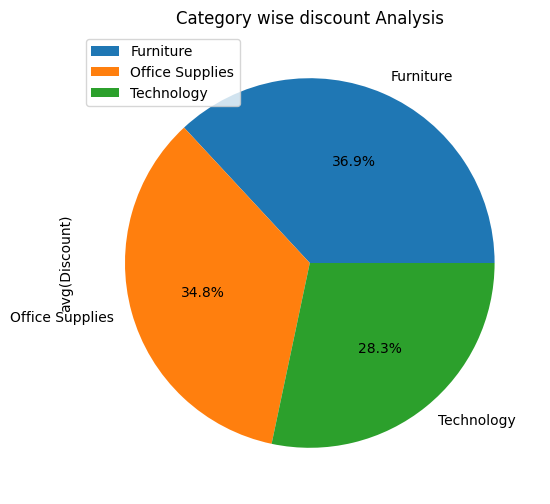

In [ ]:
category_avg_discount.plot(kind='pie', y='avg(Discount)', labels=category_avg_discount['Category'], autopct='%1.1f%%', title='Category wise discount Analysis', figsize=(6, 6))
plt.show()
#

# 16.Total number of Segment

In [ ]:
segment_count = pd.read_sql_query('''

select Segment, count(*) from "Order"
group by Segment
order by count(*) desc




''',conn)
segment_count

,Segment,count(*)
0,Consumer,1668
1,Corporate,980
2,Home Office,664


<ipython-input-134-292fcc218898>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_count, x='Segment', y='count(*)', palette='Set2')


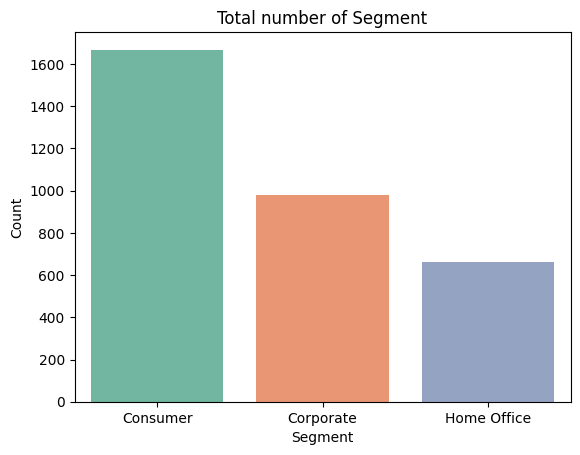

In [ ]:
sns.barplot(data=segment_count, x='Segment', y='count(*)', palette='Set2')

plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Total number of Segment')
plt.show()

#17. Segment wise average Sales

In [ ]:
segment_avg_sale = pd.read_sql_query('''

select Segment, avg(Sales) from "Order"
group by Segment
order by avg(Sales) desc




''',conn)
segment_avg_sale

,Segment,avg(Sales)
0,Corporate,246.783494
1,Home Office,240.154715
2,Consumer,198.983633


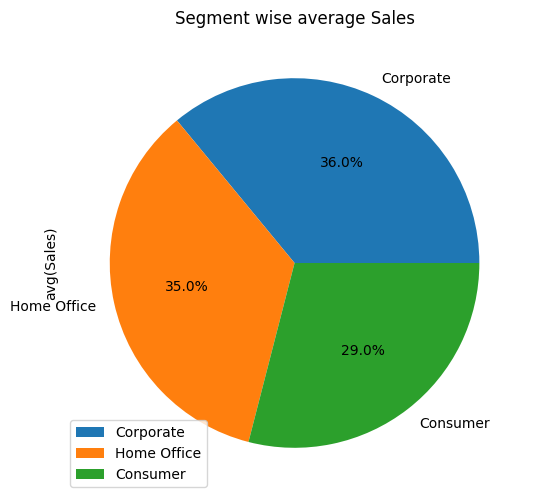

In [ ]:
segment_avg_sale.plot(kind='pie', y='avg(Sales)', labels=segment_avg_sale['Segment'], autopct='%1.1f%%', title='Segment wise average Sales', figsize=(6, 6))
plt.show()


#18. segment wise total profit

In [ ]:
segment_total_profit = pd.read_sql_query('''

select Segment, sum(profit) from "Order"
group by Segment
order by sum(profit) desc




''',conn)
segment_total_profit

,Segment,sum(profit)
0,Consumer,45568.2391
1,Corporate,26782.3633
2,Home Office,21088.6672


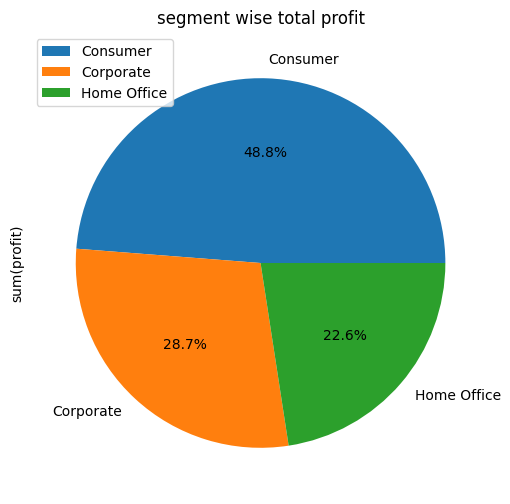

In [ ]:
segment_total_profit.plot(kind='pie', y='sum(profit)', labels=segment_total_profit['Segment'], autopct='%1.1f%%', title='segment wise total profit', figsize=(6, 6))
plt.show()

# 19.Customer wise Total order

In [ ]:
total_order_by_customer = pd.read_sql_query('''

Select Customer_Name, sum(Quantity) from "Order"
group by Customer_Name
order by sum(Quantity) desc
limit 10



''',conn)
total_order_by_customer

,Customer_Name,sum(Quantity)
0,John Lee,92
1,Seth Vernon,73
2,Janet Martin,69
3,Lena Cacioppo,68
4,Saphhira Shifley,65
5,Emily Phan,62
6,Mick Hernandez,61
7,Dean percer,61
8,Robert Waldorf,59
9,Frank Merwin,57


<Axes: title={'center': 'Customer wise Total order'}, xlabel='Customer_Name'>

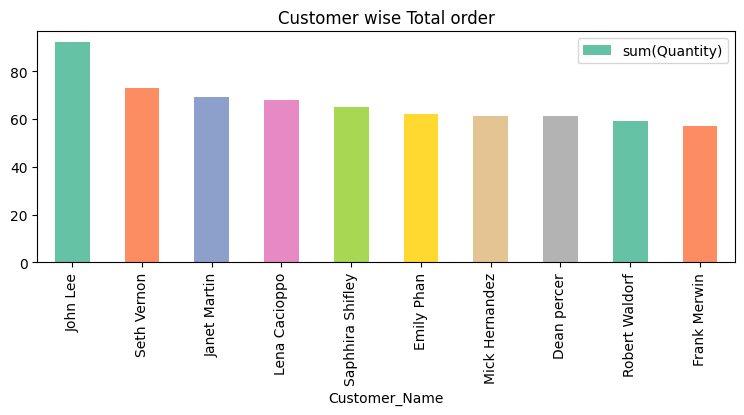

In [ ]:
  total_order_by_customer.plot(kind='bar', x='Customer_Name', y='sum(Quantity)', title='Customer wise Total order', figsize=(9, 3), color=sns.color_palette('Set2'))

In [ ]:
 pd.read_sql_query('''

select Ship_Date From "Order"



''',conn)

,Ship_Date
0,2017-06-01 00:00:00
1,2017-05-01 00:00:00
2,2017-02-01 00:00:00
3,2017-05-01 00:00:00
4,2017-05-01 00:00:00
...,...
3307,2018-03-01 00:00:00
3308,2018-03-01 00:00:00
3309,2018-03-01 00:00:00
3310,2018-03-01 00:00:00


##18. Monthly Sales Trends

In [ ]:


Month_wise_avg_sales = pd.read_sql_query('''

select Order_Month, avg(Sales) from "Order"
where "Order_Month" is not null
group by Order_Month
order by Order_Month Asc




''',conn)
Month_wise_avg_sales

,Order_Month,avg(Sales)
0,1.0,303.237257
1,2.0,221.487760
2,3.0,194.923717
3,4.0,216.634010
4,5.0,179.541090
5,6.0,150.582807
6,7.0,248.618609
7,8.0,268.236900
8,9.0,180.850547
9,10.0,182.899188


<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Order_Month'>

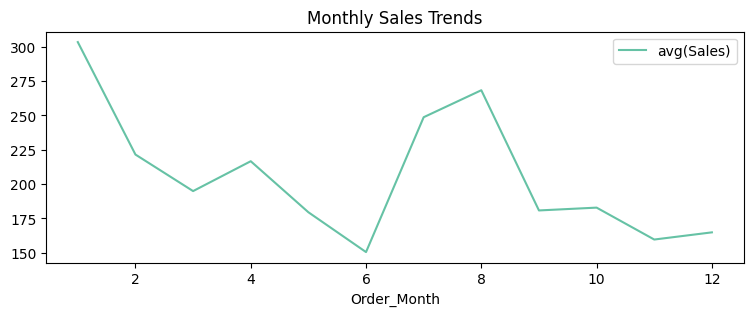

In [ ]:
Month_wise_avg_sales.plot(kind='line', x='Order_Month', y='avg(Sales)', title='Monthly Sales Trends', figsize=(9, 3), color=sns.color_palette('Set2'))

## 19. Monthly Profit Trends

In [ ]:
 Month_wise_profit = pd.read_sql_query('''

select Order_Month, sum(Profit) from "Order"
where "Order_Month" is not null
group by Order_Month
order by Order_Month Asc




''',conn)
 Month_wise_profit

,Order_Month,sum(Profit)
0,1.0,3579.1471
1,2.0,3050.2956
2,3.0,5389.1924
3,4.0,-3331.9578
4,5.0,2757.0562
5,6.0,1933.0534
6,7.0,766.0182
7,8.0,5550.3605
8,9.0,2436.6684
9,10.0,367.5196


<Axes: title={'center': 'Monthly Profit Trends'}, xlabel='Order_Month'>

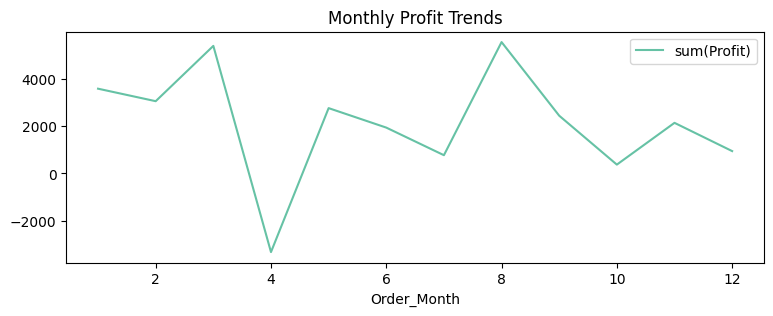

In [ ]:
Month_wise_profit.plot(kind='line', x='Order_Month', y='sum(Profit)', title='Monthly Profit Trends', figsize=(9, 3), color=sns.color_palette('Set2'))

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day',
       'Shipping_Delay'],
      dtype='object')

## 20. Region_wise_Monthly_sale

In [ ]:
 Region_wise_Monthly_sale = pd.read_sql_query('''

select Order_Month, Region, sum(Sales) from "Order"
where "Order_Month" is not null
group by Order_Month
order by Order_Month Asc






''',conn)
Region_wise_Monthly_sale

,Order_Month,Region,sum(Sales)
0,1.0,East,31839.9120
1,2.0,South,36988.4560
2,3.0,West,26899.4730
3,4.0,East,21446.7670
4,5.0,Central,15979.1570
5,6.0,South,12648.9558
6,7.0,Central,25110.4795
7,8.0,West,26823.6900
8,9.0,East,23148.8700
9,10.0,West,17558.3220


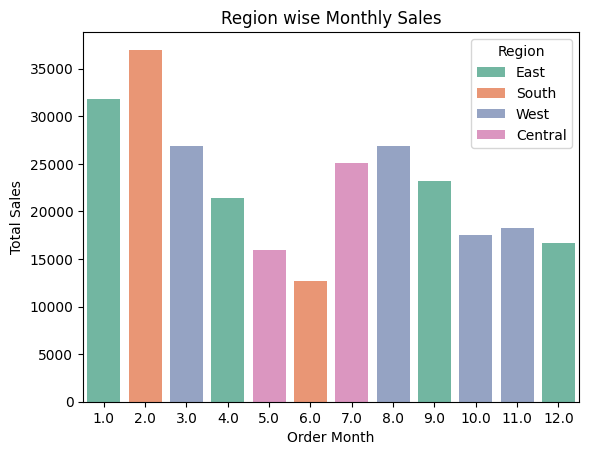

In [ ]:
sns.barplot(data=Region_wise_Monthly_sale, x='Order_Month', y='sum(Sales)', hue='Region', palette='Set2')

plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.title('Region wise Monthly Sales')
plt.show()




## 21. Region_wise_monthly_profit

In [ ]:
 Region_wise_Monthly_profit = pd.read_sql_query('''

select Order_Month, Region, sum(Profit) from "Order"
where "Order_Month" is not null
group by Order_Month
order by Order_Month Asc






''',conn)
Region_wise_Monthly_profit


,Order_Month,Region,sum(Profit)
0,1.0,East,3579.1471
1,2.0,South,3050.2956
2,3.0,West,5389.1924
3,4.0,East,-3331.9578
4,5.0,Central,2757.0562
5,6.0,South,1933.0534
6,7.0,Central,766.0182
7,8.0,West,5550.3605
8,9.0,East,2436.6684
9,10.0,West,367.5196


Text(0.5, 1.0, 'Region wise Monthly Profit')

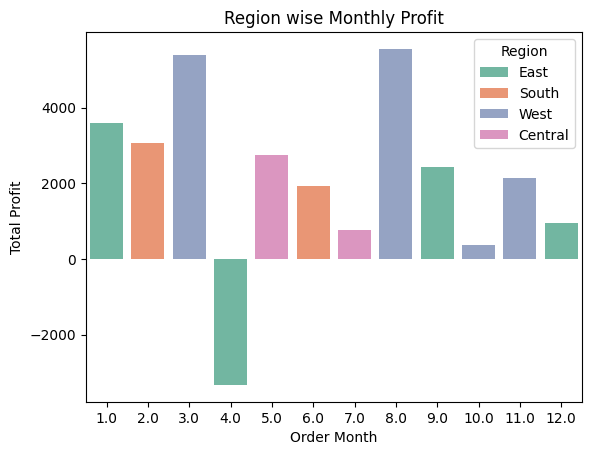

In [ ]:
sns.barplot(data=Region_wise_Monthly_profit, x='Order_Month', y='sum(Profit)', hue='Region', palette='Set2')

plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.title('Region wise Monthly Profit')



##22. Average Shipping Delay

In [ ]:
 Average_Shipping_delay_Ship_mode_wise = pd.read_sql_query('''
 select Ship_Mode, avg(Shipping_Delay) from "Order"
 group by Ship_Mode
 order by avg(Shipping_Delay) desc







''',conn)
 Average_Shipping_delay_Ship_mode_wise


,Ship_Mode,avg(Shipping_Delay)
0,Standard Class,146.754717
1,Second Class,92.211640
2,First Class,60.494565
3,Same Day,3.910112


In [ ]:
df['Shipping_Delay'].describe()

,Shipping_Delay
count,939.000000
mean,105.334398
std,55.087844
min,0.000000
25%,61.000000
50%,120.000000
75%,153.000000
max,214.000000


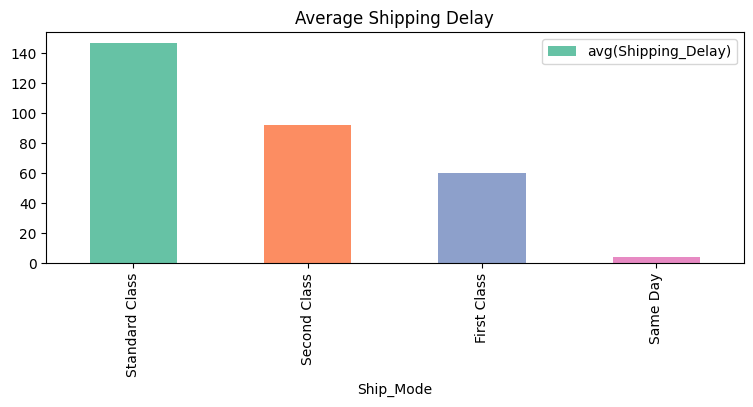

In [ ]:
Average_Shipping_delay_Ship_mode_wise.plot(kind='bar', x='Ship_Mode', y='avg(Shipping_Delay)', title='Average Shipping Delay', figsize=(9, 3), color=sns.color_palette('Set2'))
plt.show()